# H$_2$ Configuration Interaction

## Motivation:

We saw in the notes on H$_2$ in a minimal basis that single determinant methods, such as the one presented, do no accurately capture molecular dissociation.  Here I will present the configuration interaction method in the same minimal basis as a way to capture the correct dissociation behavior.  

## Learning Goals:

After working through these notes, you will be able to:

1. Describe how the Configuration Interaction method achieves the correct dissociation limit for H$_2$
2. Define the steps for performing a CI calculation for H$_2$ in a minimal basis
3. Identify the bond distance and bond energy on a plot of E vs R for H$_2$.  
4. Identify the correct variational parameter for the CI calculation of H$_2$ in a minimal basis as $R\rightarrow\infty$

## Coding Concepts:

The following coding concepts are used in this notebook:


1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Background

Recall that the bonding orbital for H$_2$ in a minimal 1s basis can be written as
\begin{align}
\psi_{MO} &= \sigma_b(1)\sigma_b(2) \\
&= \frac{\left[1s_A(1) + 1s_B(1)\right]\left[1s_A(2) + 1s_B(2)\right]}{2(1+S)} \\
&= \frac{1s_A(1)1s_B(2) + 1s_A(2)1s_B(1) + 1s_A(1)1s_A(2) + 1s_B(1)1s_B(2)}{2(1+S)}
\end{align}
The first two terms in the numerator of the last expression represent the correct dissociation limit (the separated neutral H atoms) while the last two terms in the numerator represent a hydride ion and a proton.

In order to get the correct dissociation limit with this type of wave function, we need a way of eliminating the contribution from $1s_A(1)1s_A(2) + 1s_B(1)1s_B(2)$ as $R\rightarrow\infty$.  These contributions are important at small $R$ so we cannot simply remove them from our trial wave function.  

The Configuration Interaction method is a linear variational method in which we introduce additional molecular-orbital based wavefunctions beyond just the bonding orbital.  To simplify things a bit, we need only consider the doubly populated bonding and doubly populated antibonding molecular orbitals in the minimal basis picture and thus we will consider a new trial wave function that is of the form:
\begin{equation}
\psi_{CI} = c_1 \sigma_b(1)\sigma_b(2) + c_2 \sigma_a(1)\sigma_a(2)
\end{equation}
where $\sigma_a$ is the antibonding orbital and is given by
\begin{equation}
\sigma_a(1) = \frac{1s_A(1) - 1s_B(1)}{\sqrt{2(1+S)}}
\end{equation}

In order to see how this method allows us to eliminate the ionic portion of the $\sigma_b\sigma_b$ wave function we need to expand both terms in the $CI$ wave function.
\begin{align}
\psi_{CI} &=  c_1 \sigma_b\sigma_b + c_2 \sigma_a\sigma_a \\
&= c_1\frac{\left[1s_A(1) + 1s_B(1)\right]\left[1s_A(2) + 1s_B(2)\right]}{2(1+S)} + c_2 \frac{\left[1s_A(1) - 1s_B(1)\right]\left[1s_A(2) - 1s_B(2)\right]}{2(1+S)} \\
&= \frac{1}{2(1+S)}\left[c_1\left(1s_A(1)1s_B(2) + 1s_A(2)1s_B(1) + 1s_A(1)1s_A(2) + 1s_B(1)1s_B(2) \right) +c_2\left(-1s_A(1)1s_B(2) - 1s_A(2)1s_B(1) + 1s_A(1)1s_A(2) + 1s_B(1)1s_B(2)\right) \right] \\
&= \frac{1}{2(1+S)}\left[(c_1-c_2)1s_A(1)1s_B(2) + (c_1-c_2)1s_A(2)1s_B(1) + (c_1+c_2)1s_A(1)1s_A(2) + (c_1+c_2)1s_B(1)1s_B(2) \right] \\
&= \frac{1}{2(1+S)}\left[(c_1-c_2)\left(1s_A(1)1s_B(2) + 1s_A(2)1s_B(1)\right) + (c_1+c_2)\left(1s_A(1)1s_A(2) + 1s_B(1)1s_B(2)\right) \right]
\end{align}
We now see that the wavefunction terms multiplied by $(c_1+c_2)$ are for electrons sitting on different nuclei while the terms multiplied by $(c_1-c_2)$ are for electrons sitting on the same nuclei (the ionic terms). Since $c_1+c_2$ and $c_1-c_2$ are linearly independent, these two coefficients are distinct that thus the ionic contribution can be eliminated if energetically desired.

## The CI Method

The CI method is based on the linear variational parameter method.  That is, we will need to populate an $H$ matrix and an $S$ matrix and then diagonalize $S^{-1}H$.  In this case, however, the energy (smallest eigenvalue of the $S^{-1}H$ matrix) will end up being a function that depends on $Z$ which we will minimize with respect to $Z$.  Otherwise the procedure is identical to what we have done before.  

We start by expressing the wave function again as
\begin{align}
\psi_{CI} &= c_1\psi_1 + c_2\psi_2 \\
 &= c_1 \sigma_b(1)\sigma_b(2) + c_2 \sigma_a(1)\sigma_a(2)
\end{align}

### The $S$ Matrix

We start by populating the $S$ matrix:
\begin{equation}
S = \begin{bmatrix} S_{11} & S_{12} \\ S_{12} & S_{22}\end{bmatrix}
\end{equation}

\begin{align}
S_{11} &= \left\langle \sigma_b(1)\sigma_b(2)\mid \sigma_b(1)\sigma_b(2) \right\rangle \\
& = \left\langle \sigma_b(1)\mid \sigma_b(1) \right\rangle\left\langle \sigma_b(2)\mid \sigma_b(2) \right\rangle \\
&= 1\cdot 1 = 1
\end{align}
The $\sigma_b$ orbitals are normalized as defined above thus this term is 1.  Similarly
\begin{align}
S_{22} &= \left\langle \sigma_a(1)\sigma_a(2)\mid \sigma_a(1)\sigma_a(2) \right\rangle \\
& = \left\langle \sigma_a(1)\mid \sigma_a(1) \right\rangle\left\langle \sigma_a(2)\mid \sigma_a(2) \right\rangle \\
&= 1\cdot 1 = 1
\end{align}
Now for the cross term
\begin{align}
S_{12} &= \left\langle \sigma_b(1)\sigma_b(2)\mid \sigma_a(1)\sigma_a(2) \right\rangle \\
& = \left\langle \sigma_b(1)\mid \sigma_a(1) \right\rangle\left\langle \sigma_b(2)\mid \sigma_a(2) \right\rangle \\
& = \left\langle \frac{1s_A(1) + 1s_B(1)}{\sqrt{2(1+S)}}\mid \frac{1s_A(1) - 1s_B(1)}{\sqrt{2(1+S)}} \right\rangle\left\langle \frac{1s_A(2) + 1s_B(2)}{\sqrt{2(1+S)}}\mid \frac{1s_A(2) - 1s_B(2)}{\sqrt{2(1+S)}} \right\rangle \\
& = \frac{1}{2(1+S)}\left\langle 1s_A(1) + 1s_B(1)\mid 1s_A(1) - 1s_B(1) \right\rangle\left\langle 1s_A(2) + 1s_B(2)\mid 1s_A(2) - 1s_B(2)\right\rangle \\
&= \frac{1}{2(1+S)}\left[ \left( \left\langle 1s_A(1)\mid 1s_A(1)\right\rangle - \left\langle 1s_A(1)\mid 1s_B(1)\right\rangle + \left\langle 1s_B(1)\mid 1s_A(1)\right\rangle - \left\langle 1s_B(1) \mid1s_B(1)\right) \right\rangle\left\langle 1s_A(1) + 1s_B(1)\mid 1s_A(2) - 1s_B(2)\right\rangle \right] \\
&= \frac{1}{2(1+S)}\left[ \left( 1 - S + S - 1\right) \left\langle 1s_A(1) + 1s_B(1)\mid 1s_A(2) - 1s_B(2)\right\rangle \right] \\
&= 0
\end{align}

Thus, the $S$ matrix is
\begin{equation}
S = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{equation}
and conveniently
\begin{equation}
S^{-1} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{equation}

### The $H$ Matrix

The $H$ matrix is a bit more involved than the $S$ matrix.  

We start by populating the matrix:
\begin{equation}
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_{22}\end{bmatrix}
\end{equation}

\begin{align}
H_{11} &= \left\langle \sigma_b(1)\sigma_b(2)\mid \hat{H} \mid \sigma_b(1)\sigma_b(2) \right\rangle 
\end{align}

This is just the ground state energy of the H$_2$ molecule in this minimal basis on was given in the previous notes (not derived) and provided here as well:
\begin{equation}
H_{11} = E_\psi = Z^2\left[\frac{1-S(ZR) - 2K(ZR)}{1+S(ZR)}\right] + Z\left[\frac{-2+2J(ZR) + 4K(ZR)}{1+S(ZR)}\right]+ Z\left[\frac{5/16+J'(ZR)/2+K'(ZR)+2L(ZR)}{(1+S(ZR))^2}\right] + \frac{1}{R}
\end{equation}

The $H_{22}$ element is of a similar form but not exactly the same (It should be a higher energy since it isn't the ground state and is an antibonding orbital):
\begin{align}
H_{22} &= \left\langle \sigma_a(1)\sigma_a(2)\mid \hat{H} \mid \sigma_a(1)\sigma_a(2) \right\rangle \\
    &= Z^2\left[\frac{1+S(ZR) + 2K(ZR)}{1-S(ZR)}\right] + Z\left[\frac{-2+2J(ZR) - 4K(ZR)}{1-S(ZR)}\right]+ Z\left[\frac{5/16+J'(ZR)/2+K'(ZR)-2L(ZR)}{(1-S(ZR))^2}\right] + \frac{1}{R}
\end{align}

The $H_{12}$ element is
\begin{align}
H_{12} &= \left\langle \sigma_b(1)\sigma_b(2)\mid \hat{H} \mid \sigma_a(1)\sigma_a(2) \right\rangle \\
    &= Z^2\left[\frac{\frac{5}{16} - \frac{J'(ZR)}{2}}{1-S^2(ZR)}\right] 
\end{align}

All of the integrals ($S(R)$, $J(R)$, $K(R)$, $J'(R)$, $K'(R)$ and $L(R)$) are given in a table in the [previous notes](H2_Variational_Minimal_Basis.ipynb).

### Diagonalizing the $S^{-1}H$ Matrix

Now that we have the two matrices populated, we can diagonlize the matrices.  To make things slightly complicated, the $H$ matrix elements are functions of both $Z$ and $R$ so we cannot simply determine the value of the energy unless we are given specific values for these.  While this is certainly feasible for $R$ (indeed the Born-Oppenheimer approximation is such that we need to solve the Schrodinger equation at a given value for $R$) we really want to minimize the energy with respect to $Z$ so we need to determine the minimal eigenvalue of the matrix as a function of both $R$ and $Z$.  

To do so, I will use generic expression for the matrix elements of the Hamiltonian and only plug in the formulas above in the code below when I actually solve for numbers.

\begin{align}
S^{-1}H &= \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}\begin{bmatrix} H_{11}(Z,R) & H_{12}(Z,R) \\ H_{12}(Z,R) & H_{22}(Z,R)\end{bmatrix} \\
&= \begin{bmatrix} H_{11}(Z,R) & H_{12}(Z,R) \\ H_{12}(Z,R) & H_{22}(Z,R)\end{bmatrix} 
\end{align}

We can now solve for the eigenvalues using the determinant of $S^{-1}H-\lambda I$:
\begin{align}
\begin{vmatrix}H_{11}(Z,R)-\lambda & H_{12}(Z,R) \\ H_{12}(Z,R) & H_{22}(Z,R)-\lambda \end{vmatrix} &= \left(H_{11}(Z,R)-\lambda\right)\left(H_{22}(Z,R)-\lambda\right) - H_{12}(Z,R)^2 \\
&= \lambda^2 -(H_{11}(Z,R) + H_{22}(Z,R))\lambda + (H_{11}(Z,R)H_{22}(Z,R) -H_{12}(Z,R)^2) 
\end{align}
Solving for the roots of this quadratic equation yields
\begin{align}
E_{\pm}(Z,R) &= \frac{1}{2}\left((H_{11}(Z,R) + H_{22}(Z,R)) \pm \sqrt{ (H_{11}(Z,R) + H_{22}(Z,R))^2-4(H_{11}(Z,R)H_{22}(Z,R) -H_{12}(Z,R)^2)} \right) \\
&= \frac{1}{2}\left((H_{11}(Z,R) + H_{22}(Z,R)) \pm \sqrt{ H_{11}(Z,R)^2 + H_{22}(Z,R)^2 + 2H_{11}(Z,R)H_{22}(Z,R)-4(H_{11}(Z,R)H_{22}(Z,R) -H_{12}(Z,R)^2)} \right) \\
&= \frac{1}{2}\left((H_{11}(Z,R) + H_{22}(Z,R)) \pm \sqrt{ H_{11}(Z,R)^2 + H_{22}(Z,R)^2 - 2H_{11}(Z,R)H_{22}(Z,R)+4H_{12}(Z,R)^2} \right) \\
&= \frac{1}{2}\left((H_{11}(Z,R) + H_{22}(Z,R)) \pm \sqrt{ \left(H_{11}(Z,R) - H_{22}(Z,R)\right)^2 + 4H_{12}(Z,R)^2} \right)
\end{align}

From this equation (and the equations for the $H$ matrix elements and all of the integral equations) we can solve for the $CI$ energy at a given $R$ and $Z$.  Notice that we will get two energies, one from the $+$ and one from the $-$.  In this case, the thing being added or subtracted is always positive so the $-$ is the lower energy.

Below I have code to compute this quantity as a function of $R$ and $Z$.  I compute this for $Z=1$ as well as minimize $E$ w.r.t $Z$ at each value of $R$.  In that case I use a numeric minimization procedure provided in the scipy python package.  

In [1]:
# configuration interaction for H2 in minimal basis
# H2 MO Minimal Basis
from scipy.optimize import minimize
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

gamma = 0.57721

def J(R):
    return np.exp(-2*R)*(1+1/R) - 1/R
def K(R):
    return -np.exp(-R)*(1+R)
def S(R):
    return np.exp(-R)*(1 + R + R*R/3)
def S2(R):
    return np.exp(R)*(1 - R + R*R/3)
def E1_integrand(t):
    return np.exp(-t)/t
def E1(x):
    return integrate.quad(E1_integrand,x,np.infty)[0]
def J2(R):
    return 1/R - np.exp(-2*R) * (1/R + 11/8 + 0.75*R + R*R/6)
def L(R):
    return np.exp(-R) * (R + 1/8 + 5/(16*R)) + np.exp(-3*R)*(-1/8 - 5/(16*R))
def K2(R):
    term_1 = -0.2 * np.exp(-2*R) * (-25/8 + 23*R/4 + 3*R*R + R**3/3)
    term_2 = 1.2/R * (S(R)**2 * (gamma + np.log(R)) - S2(R)**2 * E1(4*R) + 2*S(R) * S2(R) * E1(2*R))
    return term_1+term_2

def H11(Z,R):
    w = Z*R
    denom = 1+S(w)
    prefactor = Z/denom
    term1 = Z*(1 - S(w) - 2*K(w))
    term2 = -2 + 2*J(w) + 4*K(w)
    term3 = (5/16 + 0.5*J2(w) + K2(w) + 2*L(w))/denom
    return prefactor*(term1 + term2 + term3) + 1/R

def H22(Z,R):
    w = Z*R
    denom = 1-S(w)
    prefactor = Z/denom
    term1 = Z*(1 + S(w) + 2*K(w))
    term2 = -2 + 2*J(w) - 4*K(w)
    term3 = (5/16 + 0.5*J2(w) + K2(w) - 2*L(w))/denom
    return prefactor*(term1 + term2 + term3) + 1/R

def H12(Z,R):
    w = Z*R
    return Z*(5/16-0.5*J2(w))/(1-(S(w)**2))

def E_CI(Z,R):
    w = Z*R
    term1 = H11(Z,R) + H22(Z,R)
    term2 = np.sqrt((H11(Z,R) - H22(Z,R))**2 + 4*H12(Z,R)**2)
    return 0.5*(term1 - term2)

def E(Z,R):
    w = Z*R
    denom = 1+S(w)
    prefactor = Z/denom
    t1 = Z*(1-S(w)-2*K(w))
    t2 = -2 + 2*J(w) + 4*K(w)
    t3 = (5/16 + 0.5*J2(w) + K2(w) + 2*L(w))/denom
    return prefactor*(t1+t2+t3) + 1/R

# compute energy as function of R
R = np.arange(0.5,8,0.01)
E_1s_basis = np.empty(R.size)
E_1s_opt = np.empty(R.size)
E_CI_Z_1 = np.empty(R.size)
E_CI_Z_opt = np.empty(R.size)
Z_min_CI = np.empty(R.size)
Z_min_MO = np.empty(R.size)
for i, r in enumerate(R):
    E_1s_basis[i] = E(1,r)
    Z_min_MO[i] = minimize(E,1.0,args=(r)).x[0]
    E_1s_opt[i] = E(Z_min_MO[i],r)
    E_CI_Z_1[i] = E_CI(1,r)
    Z_min_CI[i] = minimize(E_CI,1.0,args=(r)).x[0]
    E_CI_Z_opt[i] = E_CI(Z_min_CI[i],r)

In [2]:
R = 1.43
Z = 1.19388
print("H11 = ", H11(Z,R))
print("H12 = ", H12(Z,R))
print("H22 = ", H22(Z,R))
H = np.array([[H11(Z,R),H12(Z,R)],[H12(Z,R),H22(Z,R)]])
e,v = np.linalg.eig(H)
print(e)

H11 =  -1.1277191603679149
H12 =  0.1741345843544521
H22 =  0.35178780005131427
[-1.14793809  0.37200673]


ValueError: x and y must have same first dimension, but have shapes (1,) and (750,)

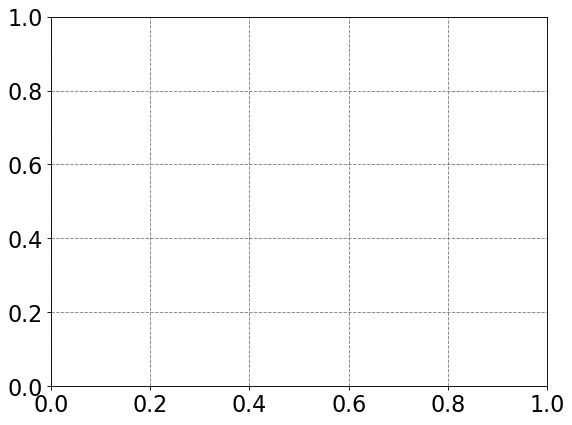

In [3]:
fig, ax = plt.subplots(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
ax.plot(R,E_CI_Z_1,lw=4, label=r'$E_{CI}$ - $Z = 1$')
ax.plot(R,E_CI_Z_opt,lw=4, label=r'$E_{CI}$ - $Z = opt$')
ax.plot(R,E_1s_basis,lw=4, label=r'$E_{MO}$ - $Z=1$')
ax.plot(R,E_1s_opt,lw=4, label=r'$E_{MO}$ - $Z= opt$')
ax.set_xlabel(r'R/$a_0$',fontsize=20)
ax.set_ylabel(r'$E_0 (Hartree)$',fontsize=20)
plt.legend(fontsize=20)
ax2 = ax.twinx()
color = 'tab:orange'
ax2.set_ylabel('Z/e', color='gray', fontsize=20)  # we already handled the x-label with ax1
ax2.plot(R, Z_min_CI, '--', lw=3, color=color, alpha=0.75)
ax2.plot(R, Z_min_MO, '--', lw=3, color='tab:red', alpha=0.75)
ax2.tick_params(axis='y', labelcolor='gray',labelsize=20)
fig.tight_layout()
plt.title(r'Configuration Interaction Solution to the H$_2$ Molecule in Minimal Slater Basis',fontsize=16);

In [2]:
min_index = np.argmin(E_CI_Z_1)
print("Bonding energy (Z=1):", np.round(E_CI_Z_1[min_index],5), "Hartree")
print("Bonding distance (Z=1):", np.round(R[min_index],5), "Bohr")
min_index = np.argmin(E_CI_Z_opt)
print("Bonding energy (Z=opt):", np.round(E_CI_Z_opt[min_index],5), "Hartree")
print("Bonding distance (Z=opt):", np.round(R[min_index],5), "Bohr")
print("Z at bond distance:", np.round(Z_min_CI[min_index],5), "e")
print("Difference from Exp: (kcal/mol):",np.round((E_CI_Z_opt[min_index]+1.174)*627.5895,2))

Bonding energy (Z=1): -1.11865 Hartree
Bonding distance (Z=1): 1.67 Bohr
Bonding energy (Z=opt): -1.14794 Hartree
Bonding distance (Z=opt): 1.43 Bohr
Z at bond distance: 1.19388 e
Difference from Exp: (kcal/mol): 16.36


### The Results

The blue ($Z=1$) and orange ($Z=opt$) curves in the plot above correspond to the CI solution in this minimal basis.  Both curves go to the correct asymptotic limit of $E=-1$ Hartree as $R\rightarrow\infty$.  This is as compared to the simple single MO picture the energy for which is plotted in the green curve ($Z=1$) which does not properly dissociate.  

Additionally, I have plotted the optimal $Z$ at each value of $R$ for both the MO and CI pictures in dashed lines (and the corresponding charge is on the right-hand y-axis).  We see that $CI$ curve (orange) also goes to the correct asymptotic limit of $Z=1$ as $R\rightarrow\infty$.  The MO curve (red) does not as we have previously discussed.

Finally, we can also look at the CI predicted energy at position of the minimum of the H$_2$ molecule.  These are
\begin{align}
E_{min} &= -1.1479\text{ Hartree} \\
R_{eq} &= 1.430 \text{ Bohr} \\
Z_{min} &= 1.194 \text{ e}
\end{align}
The energy is a modest improvement over the optimized MO calculation though the bond distance is now over estimated by 0.29 Bohr.  

Below I also include a plot of $E$ vs $R$ of H$_2$ for various methods including the optimized $CI$ method, the optimized $MO$ method, and the essentially exact Kolos and Wolniewicz data.

You can improve the CI estimate for the energy and bond distance by adding polarization functions to the basis and/or including additional terms in the basis.  We will not do that, however. The MRCI method plotted below includes both of these.

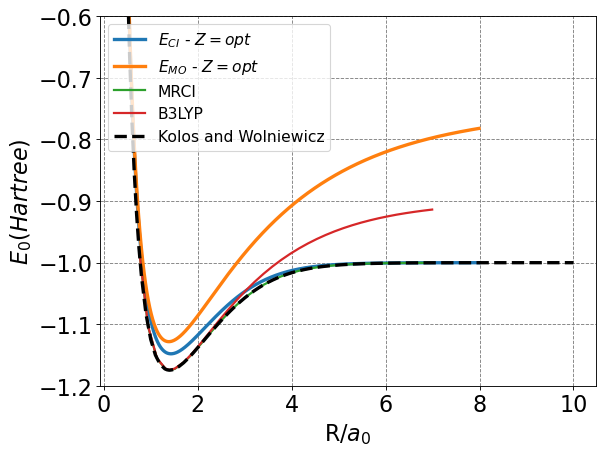

In [8]:
fig, ax = plt.subplots(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
ax.plot(R,E_CI_Z_opt,lw=3, label=r'$E_{CI}$ - $Z = opt$')
ax.plot(R,E_1s_opt,lw=3, label=r'$E_{MO}$ - $Z= opt$')
ax.set_xlabel(r'R/$a_0$',fontsize=20)
ax.set_ylabel(r'$E_0 (Hartree)$',fontsize=20)
h2_all = np.loadtxt("h2_various_methods.txt",skiprows=1)
ax.plot(h2_all[:,0]*1.88973,h2_all[:,6],lw=2,label='MRCI')
ax.plot(h2_all[:,0]*1.88973,h2_all[:,7],lw=2,label='B3LYP')
exact = np.loadtxt("h2_kolos_wolniewicz.txt",skiprows=1)
ax.plot(exact[:,0],exact[:,1],'--',lw=3,c='k',label="Kolos and Wolniewicz")
ax.set_ylim(-1.2,-0.6)
ax.legend(fontsize=14);